In [609]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import random

In [610]:
df = pd.read_csv("covid_analytics_clinical_data.csv")

for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)

df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [611]:
sampled = df.sample(100)

[0.00965707 0.01150259 0.00532911 0.01151276 0.01230818 0.01074873
 0.00889555 0.00821096 0.00987217 0.00932384 0.00580547 0.00141585
 0.0111626  0.00261866 0.00698263 0.0058626  0.00996558 0.00910508
 0.00749019 0.00161098 0.0108174  0.01427962 0.01100075 0.0079205
 0.00749154 0.00749679 0.01385413 0.01109101 0.01500958 0.00809384
 0.01045148 0.00719189 0.00207138 0.00977534 0.00451405 0.00227719
 0.01049017 0.00232807 0.00286032 0.00671319 0.00772436 0.00732847
 0.00115293 0.00409603 0.00081862 0.00154463 0.00469643 0.0024929
 0.00215936 0.00332277 0.0065761  0.00274537 0.00141184 0.00118611
 0.02514299 0.01248799 0.01081863 0.00802911 0.00793566 0.00819387
 0.0115001  0.00654777 0.00891164 0.00716933 0.00841214 0.00503877
 0.00495416 0.00194257 0.00829054 0.00804504 0.00486866 0.00327023
 0.00472314 0.00856331 0.00153925 0.00470846 0.00583301 0.00243121
 0.00393836 0.00099642 0.00149322 0.00279141 0.00802537 0.00961649
 0.00362873 0.01148282 0.01351994 0.00290967 0.00422333 0.004401

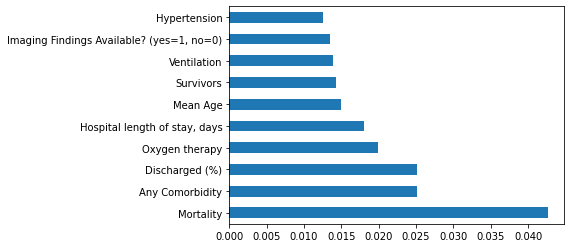

In [612]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [613]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])

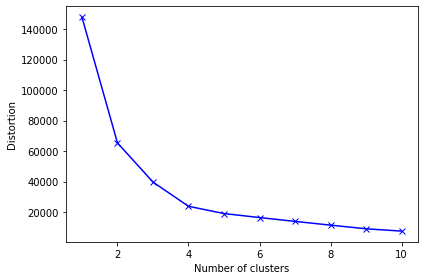

In [614]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [615]:
km = KMeans(3)

km.fit(new_df)


KMeans(n_clusters=3)

In [616]:
x = np.nan_to_num(new_df)

In [617]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)

labels = km.labels_

In [618]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-32.046176,58.229533
1,-18.271238,-16.940813
2,81.099258,1.083993
3,8.741606,-11.757388
4,-18.324378,-16.673678


In [619]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-32.046176,58.229533,2
1,-18.271238,-16.940813,0
2,81.099258,1.083993,1
3,8.741606,-11.757388,0
4,-18.324378,-16.673678,0


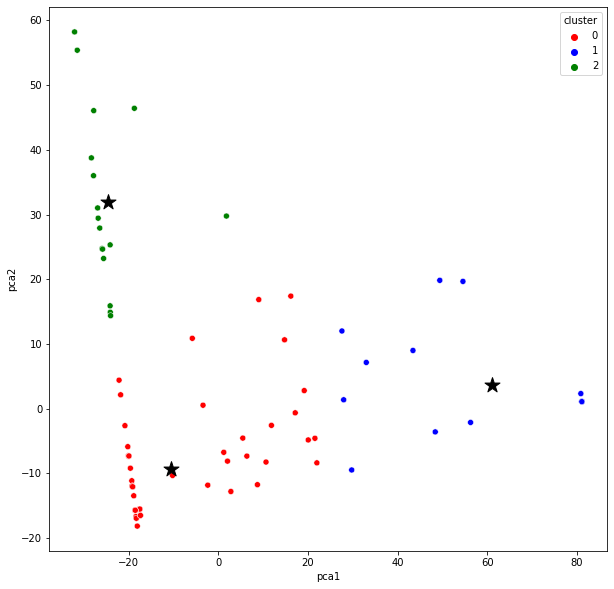

In [620]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [621]:
#Set up data for train
x = new_df
y = np.array(sampled['Projected Mortality (accounting for patients not currently discharged)'])
y = y.astype('int')


In [622]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

In [623]:
data = {'y_Actual': Y_test, 'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

,y_Actual,y_Predicted
0,7,0
1,2,2
2,7,7
3,2,2
4,2,7
...,...,...
75,6,2
76,48,0
77,7,2
78,1,1


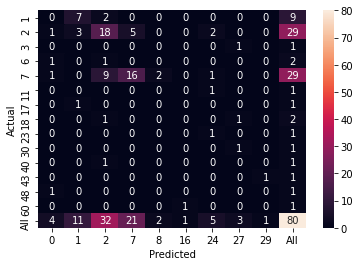

In [624]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()
